In [1]:
# Name: Zita Lo
# Student Number: 20196119
# Program: MMA
# Cohort: Winter 2021
# Course Number: MMA 869
# Date: August 13, 2020


# Answer to Question 1


In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib
matplotlib.use('Agg')
%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Read in data
df = pd.read_csv("jewelry_customers.csv")

# EDA

In [4]:
# Understand the data
df.head()
df.info()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [5]:
# To print out feature column names by categorical vs numerics
n_features = df.shape[1]
cat_col_names = list(df.select_dtypes(include=np.object).columns)
num_col_names = list(df.select_dtypes(include=np.number).columns)

print('cat_col_names: {}'.format(cat_col_names))
print('num_col_names: {}'.format(num_col_names))

cat_col_names: []
num_col_names: ['Age', 'Income', 'SpendingScore', 'Savings']


In [6]:
# Descriptive stats of the numeric features
df.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


In [7]:
# Generate Profile Report on the Jewelry DataFrame
# This part only has to generate it once 

# profile = ProfileReport(df)
# profile.to_file('Jewelry Customer Profiling Report.html')

In [8]:
# Check if there are null values
df.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

<AxesSubplot:xlabel='Age'>

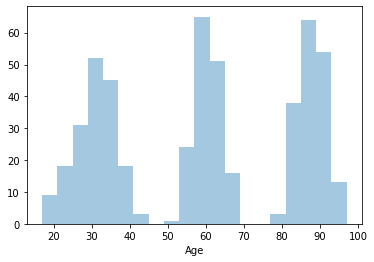

In [9]:
# Plot graph to understand data - Age
sns.distplot(df['Age'],kde=False,bins=20)

<AxesSubplot:xlabel='Income'>

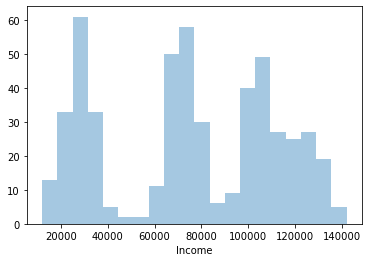

In [10]:
# Plot graph to understand data - Income distribution
sns.distplot(df['Income'],kde=False,bins=20)

<AxesSubplot:xlabel='SpendingScore'>

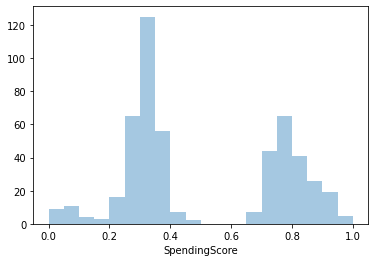

In [11]:
# Plot graph to understand data - Spending Score distribution
sns.distplot(df['SpendingScore'],kde=False,bins=20)

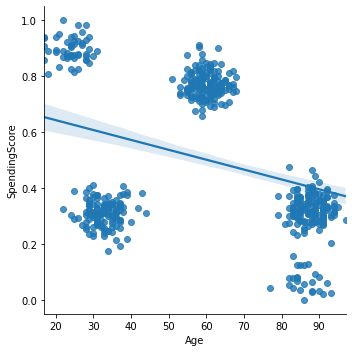

In [12]:
# Plot graph to understand data - Spending Score vs Age
sns.lmplot(data = df, y='SpendingScore',x='Age')

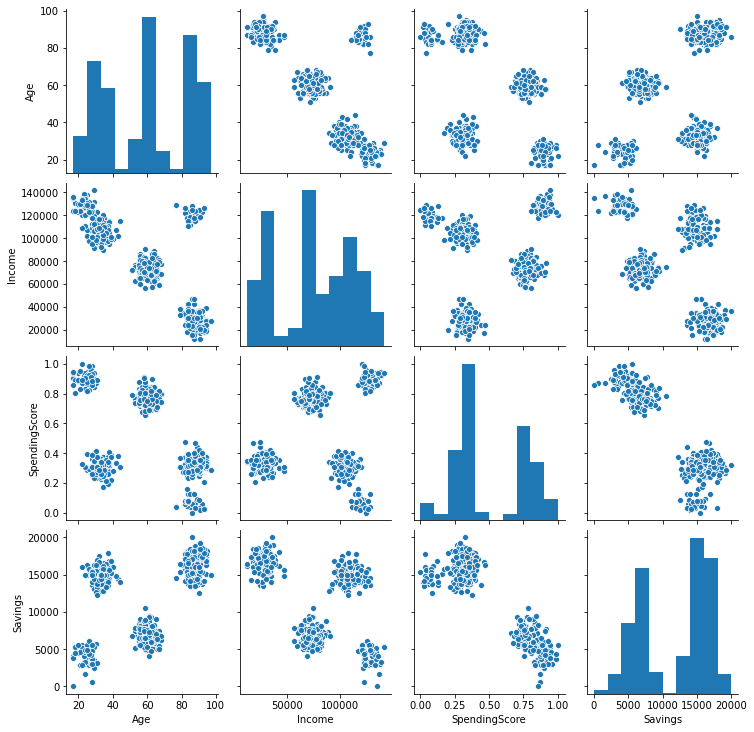

In [13]:
# Plot some graphs to understand all data in pairs
sns.pairplot(df)

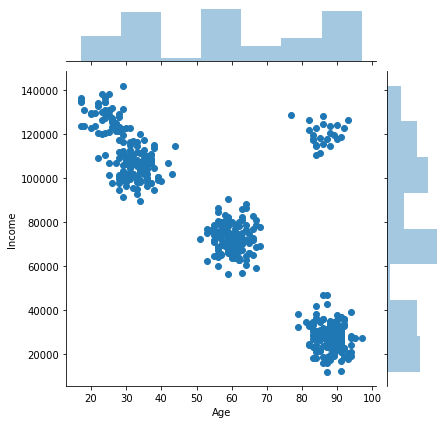

In [14]:
# Plot Age vs Income
sns.jointplot(data=df,x='Age',y='Income')

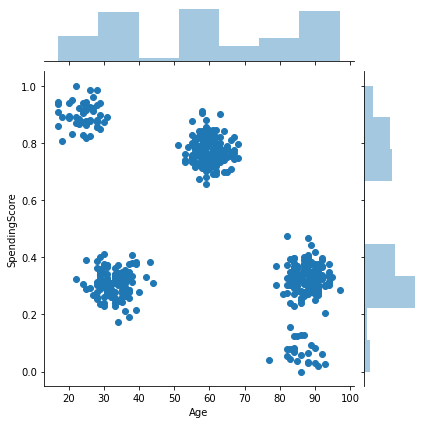

In [15]:
# Plot Age vs Spending Score
sns.jointplot(data=df,x='Age',y='SpendingScore')

<AxesSubplot:>

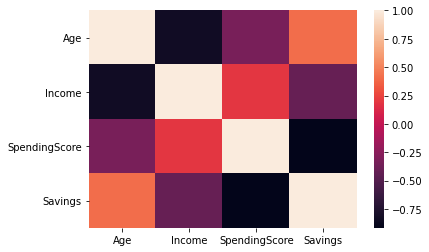

In [16]:
# Plot heat map to look at correlations between features
sns.heatmap(df.corr())

# Scale and normalize data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# To standardize features by removing the mean and scaling to unit variance. Especially income and savings features
# Most clustering algorithms e.g. Kmeans require standardize features to begin with
col_names = df.columns
col_names

scaler = StandardScaler()
X = scaler.fit_transform(df)
X

Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

In [19]:
# Convert it from series to a data frame and include headings for viewing purpose
X_feat = pd.DataFrame(X,columns=col_names)
X_feat.head()

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


# Hierarchcial Clustering

In [20]:
import scipy.cluster
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [21]:
# Perform hierarchical/agglomerative clustering - with 'ward'method and 'euclidean' metric
aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Define 5 clusters
labels = scipy.cluster.hierarchy.fcluster(aggl, 5, criterion="maxclust")


In [22]:
# Performance measure using silhouette score, calinski harabasz score and davies bouldin score
sil = silhouette_score(X , labels)
cal = calinski_harabasz_score(X, labels)
dav = davies_bouldin_score(X, labels)
print("Silhouette Score ={:.3},calinski_harabasz={},davies_bouldin={:.3}".format(sil, cal, dav))

Silhouette Score =0.805,calinski_harabasz=3671.3580185176156,davies_bouldin=0.276


# Parameter Exploration

In [23]:
# Compare performance using different paramters including the linkages, metrics and number of clusters

import itertools
def plot_agg(X, linkage, metric, num):
    aggl = scipy.cluster.hierarchy.linkage(X, method=linkage, metric=metric)    
    labels = scipy.cluster.hierarchy.fcluster(aggl, num, criterion="maxclust")
    
    sil = 0
    n = len(set(labels))
    if n > 1:
        #sil = silhouette_score(X , labels, metric=metric)
        sil = silhouette_score(X , labels)
        cal = calinski_harabasz_score(X, labels)
        dav = davies_bouldin_score(X, labels)

    print("Linkage={}, Metric={}, Clusters={}, Silhouette={:.3},calinski_harabasz={},davies_bouldin={:.3}".format(linkage, metric, n, sil, cal, dav))
    
linkages = ['complete', 'ward', 'single', 'centroid', 'average']
metrics = ['euclidean', 'minkowski', 'cityblock', 'cosine', 'correlation', 'chebyshev', 'canberra', 'mahalanobis']
num = [3,4,5,6]
for prod in list(itertools.product(linkages, metrics, num)):
    
    # Some combos are not allowed
    if (prod[0] in ['ward', 'centroid']) and prod[1] != 'euclidean':
        continue
        
    plot_agg(X, prod[0], prod[1], prod[2])

Linkage=complete, Metric=euclidean, Clusters=3, Silhouette=0.696,calinski_harabasz=1066.581241236718,davies_bouldin=0.526
Linkage=complete, Metric=euclidean, Clusters=4, Silhouette=0.758,calinski_harabasz=1611.2647365421865,davies_bouldin=0.374
Linkage=complete, Metric=euclidean, Clusters=5, Silhouette=0.805,calinski_harabasz=3671.3580185176156,davies_bouldin=0.276
Linkage=complete, Metric=euclidean, Clusters=6, Silhouette=0.63,calinski_harabasz=3082.5268424153996,davies_bouldin=0.708
Linkage=complete, Metric=minkowski, Clusters=3, Silhouette=0.696,calinski_harabasz=1066.581241236718,davies_bouldin=0.526
Linkage=complete, Metric=minkowski, Clusters=4, Silhouette=0.758,calinski_harabasz=1611.2647365421865,davies_bouldin=0.374
Linkage=complete, Metric=minkowski, Clusters=5, Silhouette=0.805,calinski_harabasz=3671.3580185176156,davies_bouldin=0.276
Linkage=complete, Metric=minkowski, Clusters=6, Silhouette=0.63,calinski_harabasz=3082.5268424153996,davies_bouldin=0.708
Linkage=complete, Me

Linkage=average, Metric=minkowski, Clusters=3, Silhouette=0.696,calinski_harabasz=1066.581241236718,davies_bouldin=0.526
Linkage=average, Metric=minkowski, Clusters=4, Silhouette=0.733,calinski_harabasz=1122.4248917714672,davies_bouldin=0.395
Linkage=average, Metric=minkowski, Clusters=5, Silhouette=0.805,calinski_harabasz=3671.358018517615,davies_bouldin=0.276
Linkage=average, Metric=minkowski, Clusters=6, Silhouette=0.772,calinski_harabasz=2989.788359822569,davies_bouldin=0.43
Linkage=average, Metric=cityblock, Clusters=3, Silhouette=0.696,calinski_harabasz=1066.581241236718,davies_bouldin=0.526
Linkage=average, Metric=cityblock, Clusters=4, Silhouette=0.758,calinski_harabasz=1611.2647365421865,davies_bouldin=0.374
Linkage=average, Metric=cityblock, Clusters=5, Silhouette=0.805,calinski_harabasz=3671.3580185176156,davies_bouldin=0.276
Linkage=average, Metric=cityblock, Clusters=6, Silhouette=0.772,calinski_harabasz=2989.788359822569,davies_bouldin=0.43
Linkage=average, Metric=cosine,

# Plot Dendogram based on Finalized Parameters

In [24]:
# Define K=5 clusters (which gives the best evaluation result) as our final version
K=5
aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")


<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Jewelry Store Customers Dendogram')

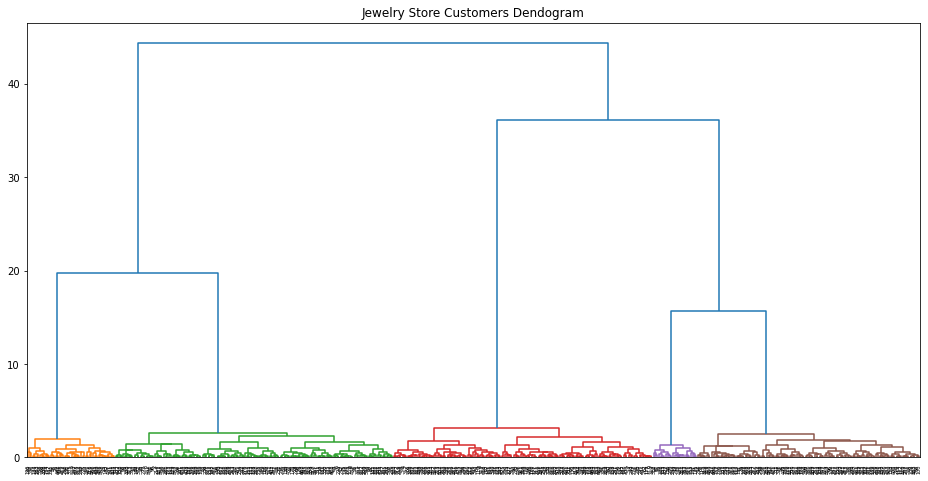

In [25]:
# Plot the dendogram with better labels
plt.figure(figsize=(16, 8))
plt.grid(False)
plt.title("Jewelry Store Customers Dendogram")
dend = scipy.cluster.hierarchy.dendrogram(aggl, color_threshold=5)
plt.savefig('jewelry_dendro_hcluster.jpg')

<Figure size 864x2520 with 0 Axes>

Text(0.5, 1.0, 'Jewelry Store Customers Dendogram')

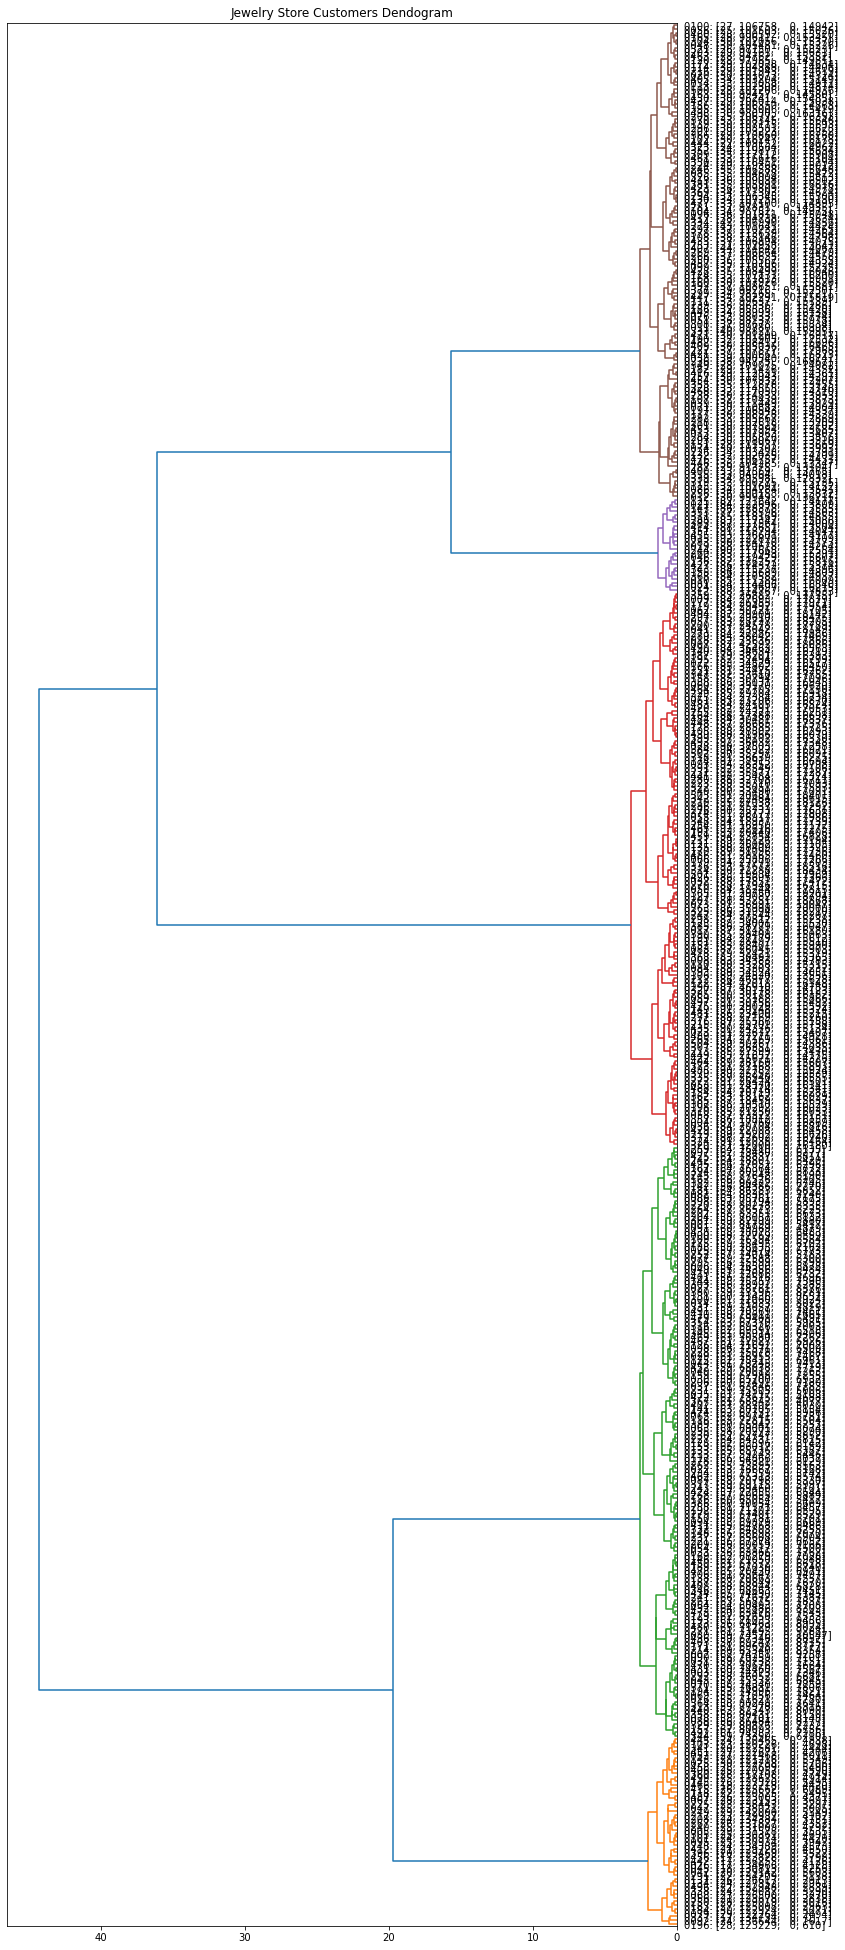

In [26]:
# Plot the dendogram with better labels

# Custom function to give each leaf of the dendrogram a label -
# Printing out feature values for each isntance in a pretty way
def llf(id):
    Xr = [int(x) for x in scaler.inverse_transform(X[id, :])]
    return "{:>04d}: [{:>2d}, {:>2d}, {:>3d}, {:>2d}]".format(id, Xr[0], Xr[1], Xr[2], Xr[3])


# Plot the dendogram with better labels
plt.figure(figsize=(12, 35))
plt.grid(False)
plt.title("Jewelry Store Customers Dendogram")  
dend = scipy.cluster.hierarchy.dendrogram(aggl, color_threshold=5, orientation="left", leaf_font_size=10, leaf_label_func=llf)

In [27]:
# Generate statistics (count and mean) for each cluster

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform(means[i,:]))
    
means




Cluster 1 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 2 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 5 (n=126):
[    32.78 105265.81      0.31  14962.78]


array([[-1.44,  1.46,  1.51, -1.57],
       [ 0.04, -0.09,  1.03, -1.01],
       [ 1.19, -1.33, -0.68,  0.97],
       [ 1.12,  1.24, -1.68,  0.6 ],
       [-1.09,  0.83, -0.75,  0.63]])

In [28]:
# Generate summarized statistics ('count', 'Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis') for each cluster

from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
#display(stats_to_df(d, scaler))
print(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(X[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    #display(stats_to_df(d, scaler))
    print(stats_to_df(d, scaler))

All Data:
Number of Instances: 505
                   Min     Mean       Max  Variance  Skewness  Kurtosis
Age              17.00    59.02     97.00     83.18     57.56     24.79
Income        12000.00 75513.29 142000.00 111541.90  70425.76  30539.63
SpendingScore     0.00     0.51      1.00      0.76      0.57      0.14
Savings           0.00 11862.46  20000.00  16816.59  10068.59   4685.19

Cluster 1:
Number of Instances: 50
                    Min      Mean       Max  Variance  Skewness  Kurtosis
Age               17.00     24.18     31.00     59.58     49.02     45.82
Income        117108.00 128029.12 142000.00  76413.35  86686.66  52197.55
SpendingScore      0.81      0.90      1.00      0.51      0.55      0.44
Savings            0.00   4087.52   6089.48  12192.66   6842.94  18038.91

Cluster 2:
Number of Instances: 157
                   Min     Mean      Max  Variance  Skewness  Kurtosis
Age              51.00    59.96    68.00     59.49     63.48     52.66
Income        56321.

In [29]:
# Generate a dataframe with headings and labelled cluster and export it as csv 
X_df = pd.DataFrame(scaler.inverse_transform(X), columns=col_names)
X_df['cluster'] = labels
X_df.head()
X_df.to_csv('Question1_HClust_Results.csv')

# Used panda's group-by function, generate statistics on different features
cl_group = X_df.groupby(['cluster']).agg('describe')
cl_group

cl_group.info()
print('\n\n','Group by Cluster - Means of Age: ')
cl_group['Age']

print('\n\n','Group by Cluster - Means of Spending Score: ')
cl_group['SpendingScore']

print('\n\n','Group by Cluster - Means of Income: ')
cl_group['Income']

print('\n\n','Group by Cluster - Means of Savings: ')
cl_group['Savings']


,Age,Income,SpendingScore,Savings,cluster
0,58.00,77769.00,0.79,6559.83,2
1,59.00,81799.00,0.79,5417.66,2
2,62.00,74751.00,0.70,9258.99,2
3,59.00,74373.00,0.77,7346.33,2
4,87.00,17760.00,0.35,16869.51,3


Age                                          Income            ...  \
         count  mean  std   min   25%   50%   75%   max  count      mean  ...   
cluster                                                                   ...   
1        50.00 24.18 3.66 17.00 22.00 24.50 27.00 31.00  50.00 128029.12  ...   
2       157.00 59.96 3.38 51.00 58.00 59.00 62.00 68.00 157.00  72448.06  ...   
3       147.00 87.78 3.51 79.00 85.00 88.00 91.00 97.00 147.00  27866.10  ...   
4        25.00 86.00 3.66 77.00 84.00 86.00 88.00 93.00  25.00 119944.04  ...   
5       126.00 32.78 3.79 22.00 30.00 33.00 35.00 44.00 126.00 105265.81  ...   

        SpendingScore      Savings                                     \
                  75%  max   count     mean     std      min      25%   
cluster                                                                 
1                0.93 1.00   50.00  4087.52 1277.75     0.00  3275.32   
2                0.80 0.91  157.00  6889.97 1052.28  4077.66  6225.38   
3                0.36 0.47  147.00 16659.26 1183.85 13470.97 15957.28   
4                0.08 0.16   25.00 14808.68 1159.34 12554.69 14047.39   
5                0.34 0.41  126.00 14962.78 1061.73 12207.53 14223.79   

                                    
             50%      75%      max  
cluster                             
1        4361.97  4986.86  6089.48  
2        6845.06  7497.23 10547.78  
3       16711.07 17433.13 20000.00  
4       14773.41 15391.95 17833.09  
5       14976.94 15682.29 17968.55  

[5 rows x 32 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Age, count)            5 non-null      float64
 1   (Age, mean)             5 non-null      float64
 2   (Age, std)              5 non-null      float64
 3   (Age, min)              5 non-null      float64
 4   (Age, 25%)              5 non-null      float64
 5   (Age, 50%)              5 non-null      float64
 6   (Age, 75%)              5 non-null      float64
 7   (Age, max)              5 non-null      float64
 8   (Income, count)         5 non-null      float64
 9   (Income, mean)          5 non-null      float64
 10  (Income, std)           5 non-null      float64
 11  (Income, min)           5 non-null      float64
 12  (Income, 25%)           5 non-null      float64
 13  (Income, 50%)           5 non-null      float64
 14  (Income, 75%)           5 non-null      float6

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,50.00,24.18,3.66,17.00,22.00,24.50,27.00,31.00
2,157.00,59.96,3.38,51.00,58.00,59.00,62.00,68.00
3,147.00,87.78,3.51,79.00,85.00,88.00,91.00,97.00
4,25.00,86.00,3.66,77.00,84.00,86.00,88.00,93.00
5,126.00,32.78,3.79,22.00,30.00,33.00,35.00,44.00




 Group by Cluster - Means of Spending Score: 


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,50.00,0.90,0.04,0.81,0.87,0.89,0.93,1.00
2,157.00,0.77,0.05,0.66,0.74,0.77,0.80,0.91
3,147.00,0.33,0.05,0.20,0.30,0.32,0.36,0.47
4,25.00,0.07,0.04,0.00,0.04,0.06,0.08,0.16
5,126.00,0.31,0.05,0.17,0.28,0.31,0.34,0.41




 Group by Cluster - Means of Income: 


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,50.00,128029.12,5688.90,117108.00,123042.00,128162.00,131435.75,142000.00
2,157.00,72448.06,6240.26,56321.00,68463.00,72027.00,76594.00,90422.00
3,147.00,27866.10,6448.81,12000.00,23361.00,27771.00,32601.00,46977.00
4,25.00,119944.04,4941.05,110582.00,117347.00,119429.00,123651.00,128596.00
5,126.00,105265.81,6080.62,89598.00,100760.25,106002.50,108858.75,119877.00




 Group by Cluster - Means of Savings: 


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,50.00,4087.52,1277.75,0.00,3275.32,4361.97,4986.86,6089.48
2,157.00,6889.97,1052.28,4077.66,6225.38,6845.06,7497.23,10547.78
3,147.00,16659.26,1183.85,13470.97,15957.28,16711.07,17433.13,20000.00
4,25.00,14808.68,1159.34,12554.69,14047.39,14773.41,15391.95,17833.09
5,126.00,14962.78,1061.73,12207.53,14223.79,14976.94,15682.29,17968.55


# Examplars

In [30]:
# Generate examplar for each cluster
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X).argmin()
   
    print('\nCluster {}:'.format(label))
    #display(df.iloc[[exemplar_idx]])
    print(df.iloc[[exemplar_idx]])


Cluster 1:
    Age  Income  SpendingScore  Savings
95   25  130934           0.91  3942.39

Cluster 2:
     Age  Income  SpendingScore  Savings
467   61   72027           0.76  6926.12

Cluster 3:
     Age  Income  SpendingScore  Savings
335   89   26940           0.33 16555.16

Cluster 4:
     Age  Income  SpendingScore  Savings
155   86  115689           0.06 14803.15

Cluster 5:
     Age  Income  SpendingScore  Savings
405   34  103204           0.30 15149.81


# Relative Importance Plots

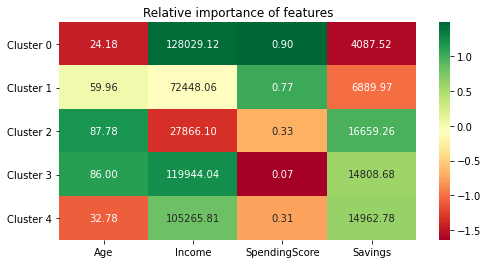

In [31]:
# The idea here is to understand how does each feature compared to overall customers
# Greener = higher value than population
# Redder = lower value than population
# Yellow = same value as population

all_means = X.mean(axis=0)
all_means
relative_imp = means - all_means
relative_imp.shape
plt.figure(figsize=(8, 4));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, 
            annot=scaler.inverse_transform(relative_imp), 
            fmt='.2f', 
            cmap='RdYlGn', 
            robust=True, 
            square=False,
            xticklabels=col_names, 
            yticklabels=['Cluster {}'.format(x) for x in range(K)]);
plt.savefig('jewelry_store_feature_importance_heatmap.png')

# Performance Metrics

In [32]:
# Performance measure for our final results using silhouette score, calinski harabasz score and davies bouldin score

# Calculate silhouette score
# The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. 
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
sil = silhouette_score(X , labels)

# Calculate calinski harabasz score
# The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.
# A higher Calinski-Harabasz score relates to a model with better defined clusters.
# The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
cal = calinski_harabasz_score(X, labels)

# Calculate davies bouldin score
# The score is defined as the average similarity measure of each cluster with its most similar cluster, 
# where similarity is the ratio of within-cluster distances to between-cluster distances. 
# Thus, clusters which are farther apart and less dispersed will result in a better score.
# he minimum score is zero, with lower values indicating better clustering.
dav = davies_bouldin_score(X, labels)
print("Silhouette Score ={:.3},calinski_harabasz={},davies_bouldin={:.3}".format(sil, cal, dav))

Silhouette Score =0.805,calinski_harabasz=3671.3580185176156,davies_bouldin=0.276
